<a href="https://colab.research.google.com/github/Alizzie/ST_CA2/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Alizzie/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 77171, done.
remote: Counting objects: 100% (25039/25039), done.
remote: Compressing objects: 100% (25037/25037), done.
remote: Total 77171 (delta 2), reused 25039 (delta 2), pack-reused 52132
Receiving objects: 100% (77171/77171), 896.69 MiB | 32.64 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (68993/68993), done.


In [ ]:
!ls

Data  sample_data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

In [ ]:
datadir1 = 'Data/DataTrack1'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data1 = pd.read_csv(os.path.join(datadir1, 'driving_log.csv'), names = columns)
print(data1.head)

<bound method NDFrame.head of                                                  center  \
0     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
1     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
2     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
3     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
4     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
...                                                 ...   
8316  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
8317  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
8318  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
8319  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
8320  C:\Users\elisa\OneDrive - hochschule-trier.de\...   

                                                   left  \
0     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
1     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
2     C:\Users\elisa\OneDrive - hochschule-trier.de\...   
3     C:\Users\elisa\OneD

In [ ]:
datadir2 = 'Data/DataTrack2'
data2 = pd.read_csv(os.path.join(datadir2, 'driving_log.csv'), names=columns)
print(data2)

                                                  center  \
0      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
1      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
2      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
3      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
4      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
...                                                  ...   
14671  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
14672  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
14673  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
14674  C:\Users\elisa\OneDrive - hochschule-trier.de\...   
14675  C:\Users\elisa\OneDrive - hochschule-trier.de\...   

                                                    left  \
0      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
1      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
2      C:\Users\elisa\OneDrive - hochschule-trier.de\...   
3      C:\Users\elisa\OneDrive - hochsc

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [ ]:
data1['center'] = data1['center'].apply(path_leaf)
data1['left'] = data1['left'].apply(path_leaf)
data1['right'] = data1['right'].apply(path_leaf)

In [ ]:
print(data1.head)

<bound method NDFrame.head of                                   center                              left  \
0     center_2023_12_30_22_17_33_627.jpg  left_2023_12_30_22_17_33_627.jpg   
1     center_2023_12_30_22_17_33_695.jpg  left_2023_12_30_22_17_33_695.jpg   
2     center_2023_12_30_22_17_33_779.jpg  left_2023_12_30_22_17_33_779.jpg   
3     center_2023_12_30_22_17_33_865.jpg  left_2023_12_30_22_17_33_865.jpg   
4     center_2023_12_30_22_17_33_936.jpg  left_2023_12_30_22_17_33_936.jpg   
...                                  ...                               ...   
8316  center_2023_12_30_22_34_01_654.jpg  left_2023_12_30_22_34_01_654.jpg   
8317  center_2023_12_30_22_34_01_724.jpg  left_2023_12_30_22_34_01_724.jpg   
8318  center_2023_12_30_22_34_01_809.jpg  left_2023_12_30_22_34_01_809.jpg   
8319  center_2023_12_30_22_34_01_875.jpg  left_2023_12_30_22_34_01_875.jpg   
8320  center_2023_12_30_22_34_02_041.jpg  left_2023_12_30_22_34_02_041.jpg   

                                 

In [ ]:
data2['center'] = data2['center'].apply(path_leaf)
data2['left'] = data2['left'].apply(path_leaf)
data2['right'] = data2['right'].apply(path_leaf)

In [ ]:
print(data2.head)

<bound method NDFrame.head of                                    center                              left  \
0      center_2024_01_11_19_12_36_336.jpg  left_2024_01_11_19_12_36_336.jpg   
1      center_2024_01_11_19_12_36_403.jpg  left_2024_01_11_19_12_36_403.jpg   
2      center_2024_01_11_19_12_36_482.jpg  left_2024_01_11_19_12_36_482.jpg   
3      center_2024_01_11_19_12_36_565.jpg  left_2024_01_11_19_12_36_565.jpg   
4      center_2024_01_11_19_12_36_634.jpg  left_2024_01_11_19_12_36_634.jpg   
...                                   ...                               ...   
14671  center_2024_01_13_21_19_41_760.jpg  left_2024_01_13_21_19_41_760.jpg   
14672  center_2024_01_13_21_19_41_841.jpg  left_2024_01_13_21_19_41_841.jpg   
14673  center_2024_01_13_21_19_41_909.jpg  left_2024_01_13_21_19_41_909.jpg   
14674  center_2024_01_13_21_19_41_992.jpg  left_2024_01_13_21_19_41_992.jpg   
14675  center_2024_01_13_21_19_42_136.jpg  left_2024_01_13_21_19_42_136.jpg   

                     

In [ ]:
def show_data_distribution(data, samples_per_bin):
  num_bins = 25
  hist, bins = np.histogram(data['steering'], num_bins)
  print(bins)

  centre = (bins[:-1] + bins[1:])*0.5
  plt.bar(centre, hist, width=0.05)
  plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
  return num_bins, bins, samples_per_bin, centre

In [ ]:
def remove_data(data, num_bins, bins, samples_per_bin):
  remove_list = []
  for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
      if bins[j] <= data['steering'][i] <= bins[j+1]:
        list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
  print("Removed: ", len(remove_list))
  data.drop(data.index[remove_list], inplace = True)
  print("Remaining: ", len(data))
  return data

In [ ]:
def show_new_data_distribution(data, centre, samples_per_bin):
  hist, bins = np.histogram(data['steering'], num_bins)
  plt.bar(centre, hist, width=0.05)
  plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


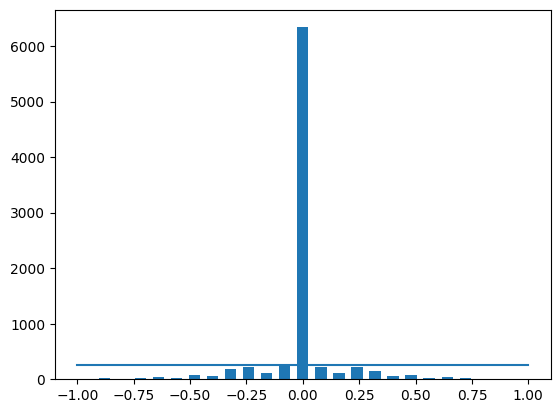

In [ ]:
num_bins, bins, samples_per_bin, centre = show_data_distribution(data1, 250)

Removed:  6086
Remaining:  2235


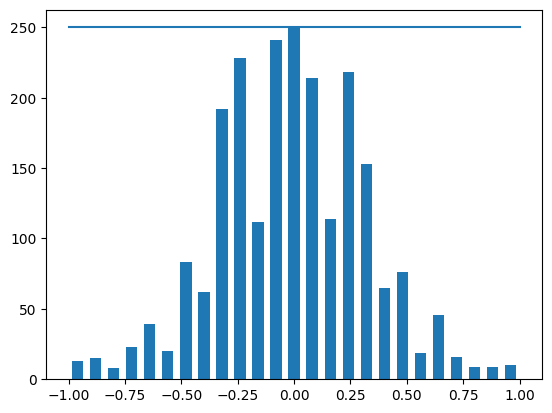

In [ ]:
data = remove_data(data1, num_bins, bins, samples_per_bin)
show_new_data_distribution(data1, centre, samples_per_bin)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


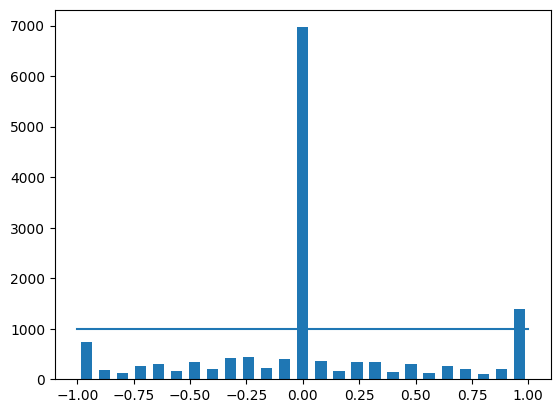

In [ ]:
num_bins, bins, samples_per_bin, centre = show_data_distribution(data2, 1000)

Removed:  6354
Remaining:  8322


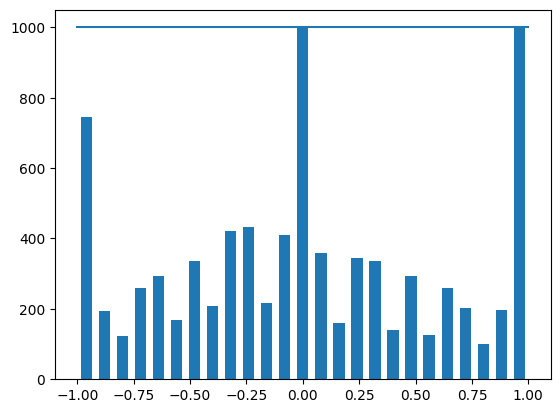

In [ ]:
data = remove_data(data2, num_bins, bins, samples_per_bin)
show_new_data_distribution(data2, centre, samples_per_bin)

In [ ]:
# Training and Validation split
def load_img_steering(datadir, data):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

In [ ]:
image_paths_data1, steerings_data1 = load_img_steering(datadir1+'/IMG', data1)
image_paths_data2, steerings_data2 = load_img_steering(datadir2+'/IMG', data2)

In [ ]:
print(len(image_paths_data1), len(image_paths_data2))
print(len(steerings_data1), len(steerings_data2))
image_paths = np.concatenate((image_paths_data1, image_paths_data2))
steerings = np.concatenate((steerings_data1, steerings_data2))
print(len(image_paths), len(steerings))

2235 8322
2235 8322
10557 10557


(array([ 757.,  208.,  130.,  283.,  333.,  188.,  419.,  270.,  612.,
         662.,  330.,  651., 1250.,  572.,  273.,  563.,  488.,  206.,
         369.,  146.,  304.,  218.,  109.,  206., 1010.]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <BarContainer object of 25 artists>)

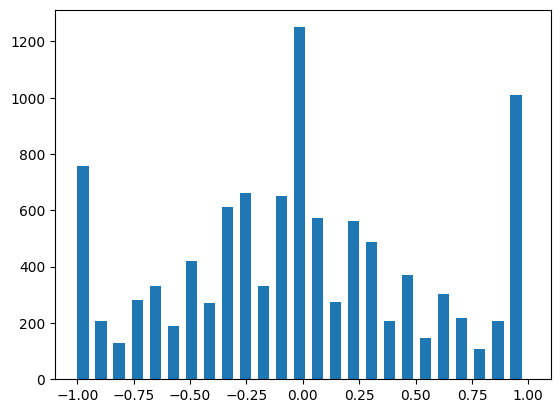

In [ ]:
plt.hist(steerings, bins=num_bins, width=0.05)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print(f"Traing samples {len(X_train)}, validation samples {len(X_valid)}")

Traing samples 8445, validation samples 2112


Text(0.5, 1.0, 'Validation set')

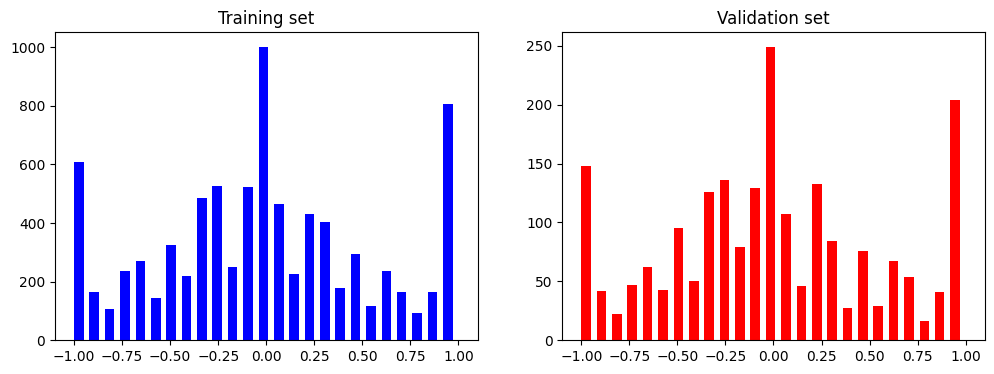

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins = num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(img):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(img)
  return image

Text(0.5, 1.0, 'Zoomed image')

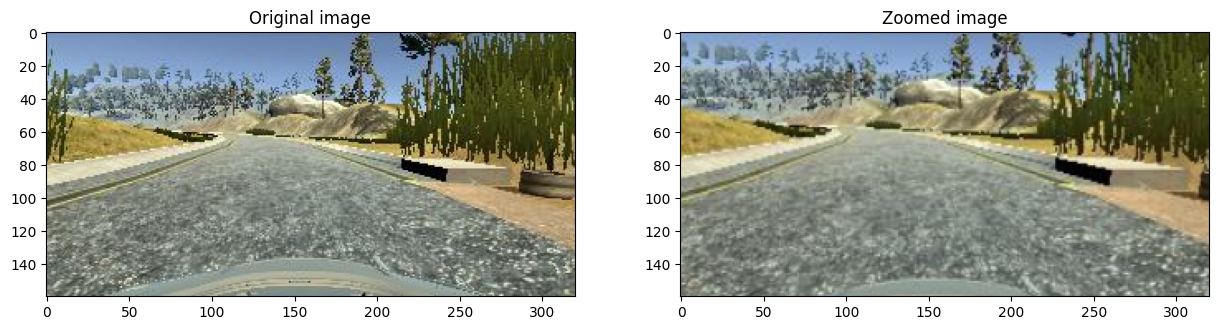

In [ ]:
image = image_paths[random.randint(0, 100)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Zoomed image")

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x":(-0.1, 0.1), "y":(-0.1, 0.1)})
  panned_image = pan.augment_image(image)
  return panned_image

Text(0.5, 1.0, 'Panned image')

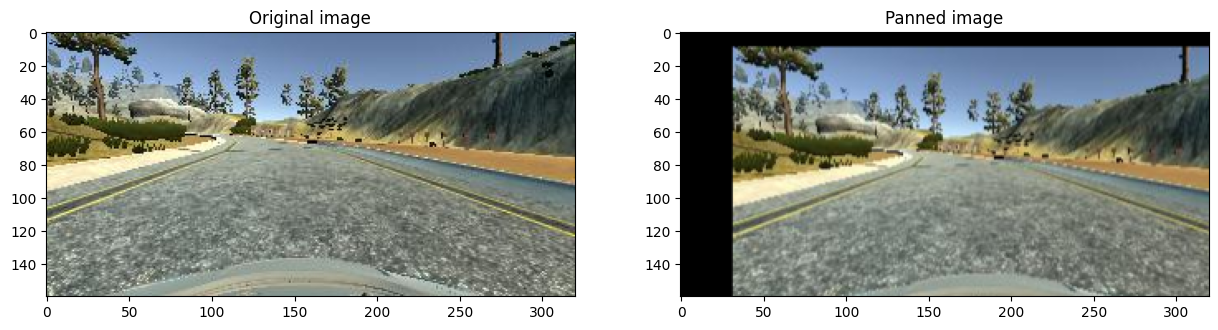

In [ ]:
image = image_paths[random.randint(0, 100)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image")
axes[1].imshow(panned_image)
axes[1].set_title("Panned image")

In [ ]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brighten image')

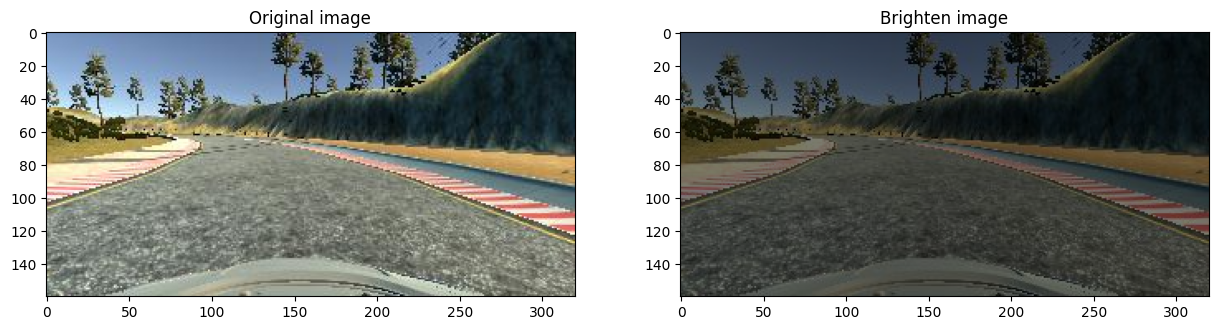

In [ ]:
image = image_paths[random.randint(0, 100)]
original_image = mpimg.imread(image)
brighten_image = img_random_brightness(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image")
axes[1].imshow(brighten_image)
axes[1].set_title("Brighten image")

In [ ]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = - steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'Flipped image - Steering Angle: 0.15')

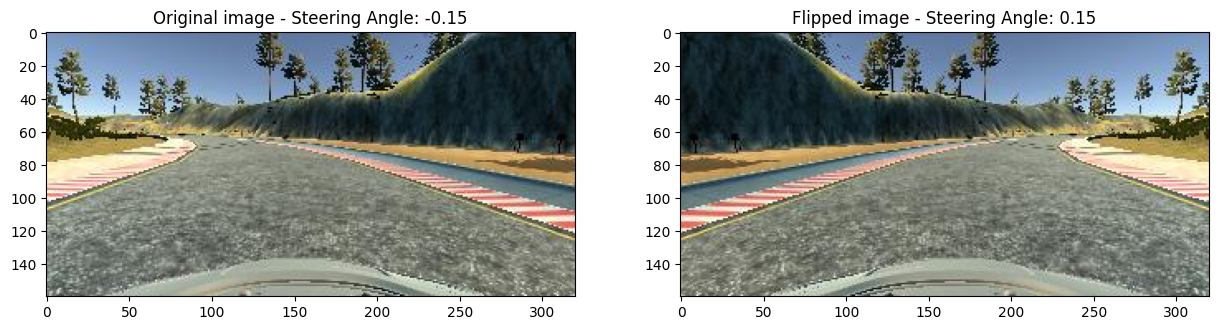

In [ ]:
random_index = random.randint(0, 100)
image = image_paths[random_index]
steering_angle = steerings[random_index]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle  = img_random_flip(original_image, steering_angle)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image - " + "Steering Angle: " + str(steering_angle))
axes[1].imshow(flipped_image)
axes[1].set_title("Flipped image - " + "Steering Angle: " + str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle

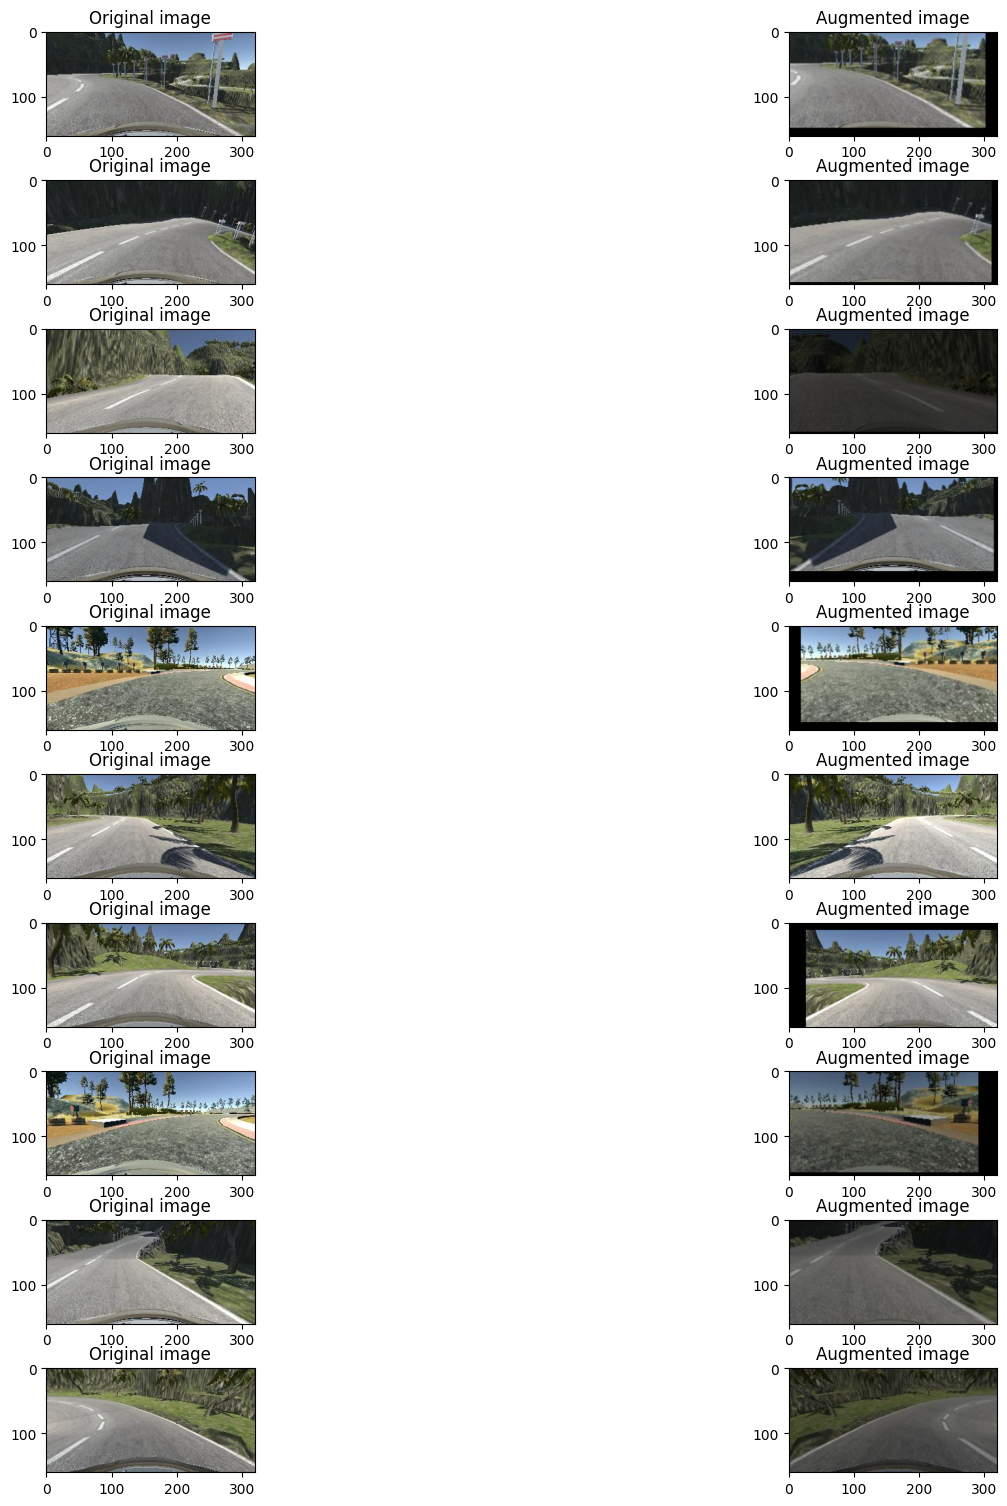

In [ ]:
nrcols = 2
nrrows = 10
fig, axes = plt.subplots(nrrows, nrcols, figsize=(15, 15))
fig.tight_layout()
for i in range(10):
  rand_num = random.randint(0, len(image_paths)-1)
  random_image = image_paths[rand_num]
  random_steering = steerings[rand_num]
  original_image = mpimg.imread(random_image)
  augmented_image, steering_angle = random_augment(random_image, random_steering)
  axes[i][0].imshow(original_image)
  axes[i][0].set_title("Original image")
  axes[i][1].imshow(augmented_image)
  axes[i][1].set_title("Augmented image")

In [ ]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [ ]:
def img_preprocess_no_imread(img):
  img = img[60:135, :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [ ]:
def batch_generator(image_paths, steering_angles, batch_size, is_training):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths)-1)
      if is_training:
        img, steering = random_augment(image_paths[random_index], steering_angles[random_index])
      else:
        img = mpimg.imread(image_paths[random_index])
        steering = steering_angles[random_index]
      img = img_preprocess_no_imread(img)
      batch_img.append(img)
      batch_steering.append(steering)
    yield(np.asarray(batch_img), np.asarray(batch_steering))


Text(0.5, 1.0, 'Preprocessed Image')

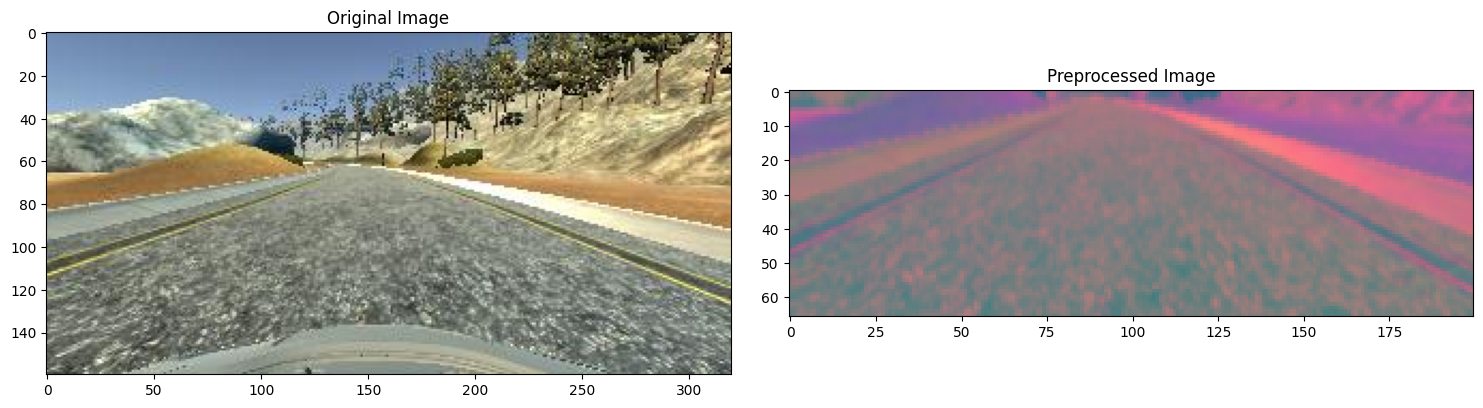

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)
fig, axes = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")


In [ ]:
#X_train = np.array(list(map(img_preprocess, X_train)))
#X_valid = np.array(list(map(img_preprocess, X_valid)))

In [ ]:
# https://arxiv.org/pdf/1604.07316v1.pdf
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
  model.add(BatchNormalization())
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(BatchNormalization())
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(BatchNormalization())
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(BatchNormalization())
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))

  optimizer = Adam(learning_rate = 0.001)
  model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
  return model


In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 batch_normalization (Batch  (None, 31, 98, 24)        96        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 47, 36)        144       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 batch_normalization_2 (Bat  (None, 5, 22, 48)         1

In [41]:
history = model.fit(
    batch_generator(X_train, y_train, batch_size=200, is_training=1),
    steps_per_epoch=700,
    epochs=20,
    validation_data=batch_generator(X_valid, y_valid, batch_size=200, is_training=0),
    validation_steps=200,
    verbose=1,
    shuffle=True
)


Epoch 1/20
700/700 [==============================] - 487s 681ms/step - loss: 1.2071 - mae: 0.8029 - val_loss: 0.1880 - val_mae: 0.3340
Epoch 2/20
700/700 [==============================] - 484s 693ms/step - loss: 0.2998 - mae: 0.4310 - val_loss: 0.1602 - val_mae: 0.3115
Epoch 3/20
700/700 [==============================] - 489s 699ms/step - loss: 0.1900 - mae: 0.3435 - val_loss: 0.1125 - val_mae: 0.2685
Epoch 4/20
700/700 [==============================] - 466s 667ms/step - loss: 0.1634 - mae: 0.3189 - val_loss: 0.1154 - val_mae: 0.2710
Epoch 5/20
700/700 [==============================] - 463s 662ms/step - loss: 0.1526 - mae: 0.3081 - val_loss: 0.1177 - val_mae: 0.2695
Epoch 6/20
700/700 [==============================] - 456s 652ms/step - loss: 0.1457 - mae: 0.3020 - val_loss: 0.0985 - val_mae: 0.2544
Epoch 7/20
700/700 [==============================] - 440s 629ms/step - loss: 0.1409 - mae: 0.2975 - val_loss: 0.0958 - val_mae: 0.2520
Epoch 8/20
700/700 [============================

Text(0.5, 0, 'Epoch')

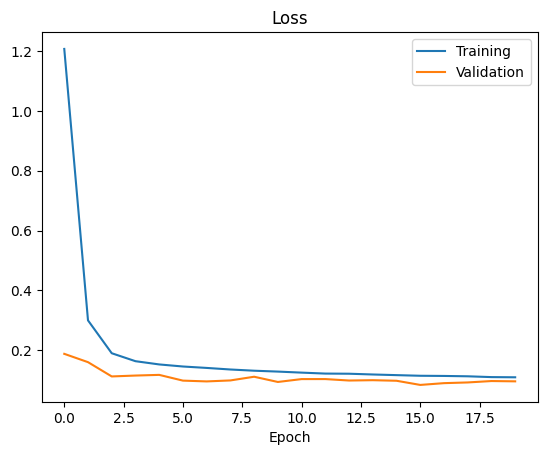

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [46]:
model.save('delta_model_epoch20_batch200_steps700.h5')

In [47]:
!ls
from google.colab import files
files.download('delta_model_epoch20_batch200_steps700.h5')

Data					  delta_model_epoch20_batch200_steps700.h5
delta_model_epoch10_batch200_steps650.h5  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>